In the world of Pokémon, the balance of power is not just about who has the highest attack or defense. It's a complex interplay of various stats that determine the ultimate champion. Today, we dive into the Pokémon dataset to uncover the hidden patterns and perhaps predict which Pokémon might reign supreme.

If you find this notebook insightful, consider giving it an upvote.

## Table of Contents
1. [Data Loading and Overview](#data-loading)
2. [Exploratory Data Analysis](#eda)
3. [Statistical Analysis](#statistical-analysis)
4. [Predictive Modeling](#predictive-modeling)
5. [Conclusion and Future Work](#conclusion)

## Data Loading and Overview <a id='data-loading'></a>

In [11]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../kaggle/pokedex.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


## Exploratory Data Analysis <a id='eda'></a>
Let's explore the dataset to understand the distribution of different Pokémon types and their stats.

In [12]:
# Summary statistics
df.describe()

,Index,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,501.735802,443.104527,71.244444,81.152263,75.007407,73.224691,72.441152,70.034568
std,298.979081,121.193406,26.927819,32.037134,30.740999,32.757152,27.578188,30.161298
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,240.500000,332.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,495.000000,465.000000,70.000000,80.000000,70.000000,65.000000,70.000000,68.000000
75%,753.500000,521.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1025.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


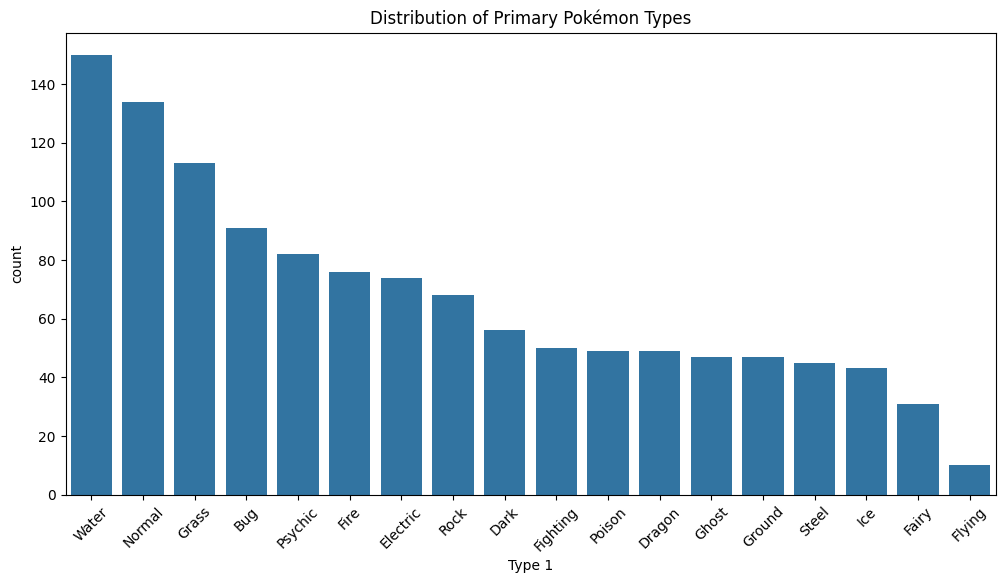

In [13]:
# Distribution of Pokémon types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Type 1', order=df['Type 1'].value_counts().index)
plt.title('Distribution of Primary Pokémon Types')
plt.xticks(rotation=45)
plt.show()

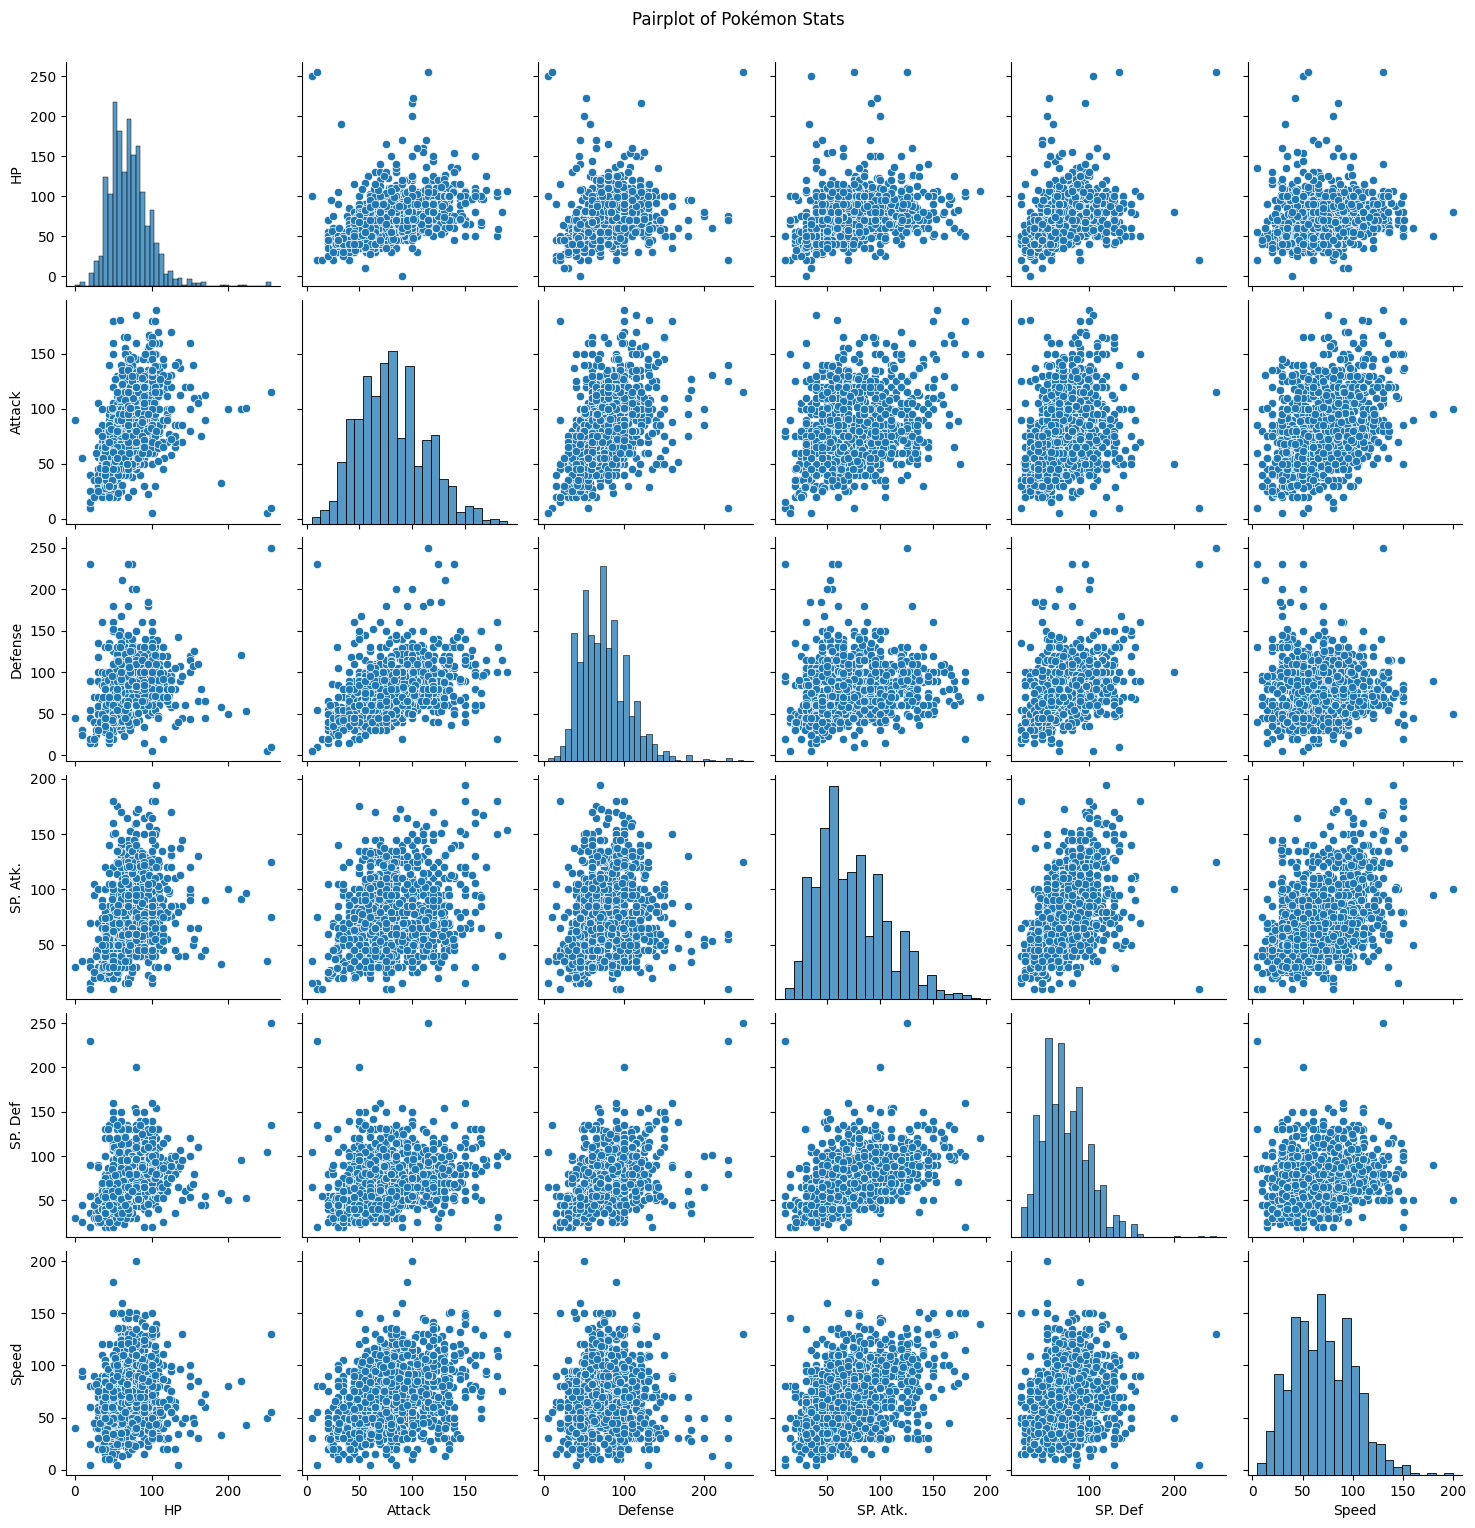

In [14]:
# Pairplot of stats
sns.pairplot(df[['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']])
plt.suptitle('Pairplot of Pokémon Stats', y=1.02)
plt.show()

## Statistical Analysis <a id='statistical-analysis'></a>
Let's delve into the correlations between different stats to see if any interesting patterns emerge.

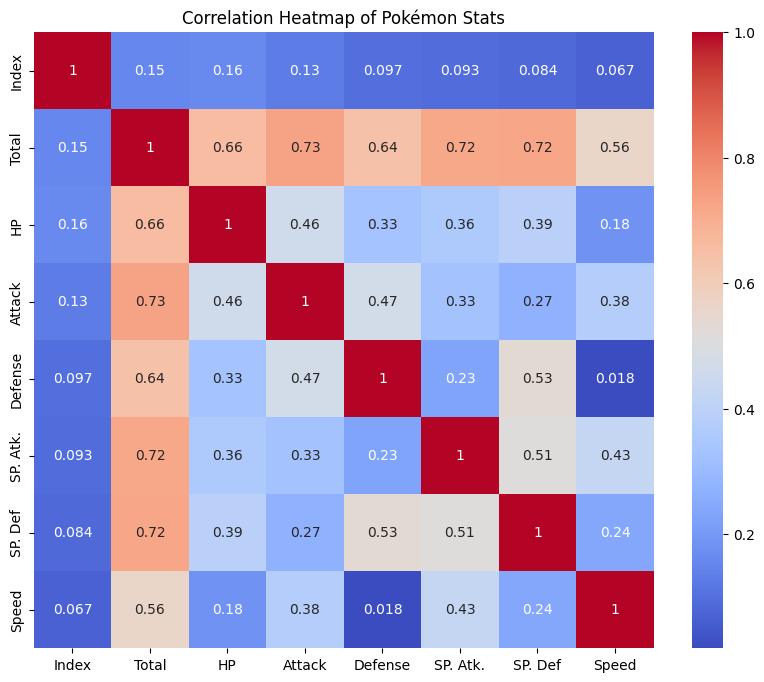

In [15]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Pokémon Stats')
plt.show()

## Predictive Modeling <a id='predictive-modeling'></a>
Can we predict a Pokémon's total stats based on its individual attributes? Let's find out using a simple linear regression model.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df[['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']]
y = df['Total']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(np.float64(1.2462625853834318e-26), 1.0)

## Conclusion and Future Work <a id='conclusion'></a>
In this analysis, we explored the Pokémon dataset, visualized the distribution of types and stats, and built a predictive model to estimate a Pokémon's total stats based on its individual attributes. The linear regression model provided a reasonable fit, but there's always room for improvement.

Future work could involve exploring more complex models, such as decision trees or neural networks, to improve prediction accuracy. Additionally, incorporating more features, such as Pokémon type or evolutionary stage, could provide further insights.

If you found this notebook helpful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)